In [1]:
from bs4 import BeautifulSoup
from selenium import webdriver
from selenium.webdriver.common.by import By
from IPython.display import Image
from itertools import count
import pandas as pd
import time
import re

In [2]:
# 웹드라이브로 크롬브라우즈 띄운다.
driver_path = "../driver/chromedriver.exe"
driver = webdriver.Chrome(executable_path=driver_path)

C:\Users\student\AppData\Local\Temp\ipykernel_4472\3620293503.py:3: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome(executable_path=driver_path)


In [3]:
url_page = 'https://www.naver.com/'
driver.get(url_page)

In [4]:
# 검색창에 검색어 입력

search_word ='보이스피싱'
css_selector = '#query'
driver.find_element(by=By.CSS_SELECTOR, value=css_selector).send_keys(search_word)

In [26]:
# 검색버튼클릭
css_selector = '#search_btn'
driver.find_element(by=By.CSS_SELECTOR, value=css_selector).click()

In [27]:
# 뉴스클릭
css_selector = '#lnb > div.lnb_group > div > ul > li:nth-child(2) > a'
driver.find_element(by=By.CSS_SELECTOR, value=css_selector).click()

In [28]:
# 옵션버튼 클릭
css_selector = '#snb > div.api_group_option_filter._search_option_simple_wrap > div > div.option_filter > a > i'
driver.find_element(by=By.CSS_SELECTOR, value=css_selector).click()

In [29]:
# 기간설정
css_selector = '#snb > div.api_group_option_sort._search_option_detail_wrap > ul > li.bx.term > div > div.option > a.txt.txt_option._calendar_select_trigger'
driver.find_element(by=By.CSS_SELECTOR, value=css_selector).click()

In [78]:
# 시작하는날 
# 2016년 1월1일
# Year
css_selector = '#snb > div.api_group_option_sort._search_option_detail_wrap > ul > li.bx.term > div > div.api_select_option.type_calendar._calendar_select_layer > div.select_wrap._root > div:nth-child(1) > div > div > div > ul > li:nth-child(28) > a'
driver.find_element(by=By.CSS_SELECTOR, value=css_selector).click()

#Month
css_selector = '#snb > div.api_group_option_sort._search_option_detail_wrap > ul > li.bx.term > div > div.api_select_option.type_calendar._calendar_select_layer > div.select_wrap._root > div:nth-child(2) > div > div > div > ul > li:nth-child(1) > a'
driver.find_element(by=By.CSS_SELECTOR, value=css_selector).click()

#day
css_selector = '#snb > div.api_group_option_sort._search_option_detail_wrap > ul > li.bx.term > div > div.api_select_option.type_calendar._calendar_select_layer > div.select_wrap._root > div:nth-child(3) > div > div > div > ul > li:nth-child(1) > a'
driver.find_element(by=By.CSS_SELECTOR, value=css_selector).click()


In [79]:
css_selector = '#snb > div.api_group_option_sort._search_option_detail_wrap > ul > li.bx.term > div > div.api_select_option.type_calendar._calendar_select_layer > div.set_calendar > span:nth-child(3) > a'
driver.find_element(by=By.CSS_SELECTOR, value=css_selector).click()

In [80]:
# 끝나는날
# 2016년 12월31일
#year
css_selector = '#snb > div.api_group_option_sort._search_option_detail_wrap > ul > li.bx.term > div > div.api_select_option.type_calendar._calendar_select_layer > div.select_wrap._root > div:nth-child(1) > div > div > div > ul > li:nth-child(28) > a'
driver.find_element(by=By.CSS_SELECTOR, value=css_selector).click()

#Month
css_selector = '#snb > div.api_group_option_sort._search_option_detail_wrap > ul > li.bx.term > div > div.api_select_option.type_calendar._calendar_select_layer > div.select_wrap._root > div:nth-child(2) > div > div > div > ul > li:nth-child(12) > a'
driver.find_element(by=By.CSS_SELECTOR, value=css_selector).click()

#day
css_selector = '#snb > div.api_group_option_sort._search_option_detail_wrap > ul > li.bx.term > div > div.api_select_option.type_calendar._calendar_select_layer > div.select_wrap._root > div:nth-child(3) > div > div > div > ul > li:nth-child(31) > a'
driver.find_element(by=By.CSS_SELECTOR, value=css_selector).click()

In [16]:
# 적용버튼 클릭하기
css_selector = '#snb > div.api_group_option_sort._search_option_detail_wrap > ul > li.bx.term > div > div.api_select_option.type_calendar._calendar_select_layer > div.btn_area > button'
driver.find_element(by=By.CSS_SELECTOR, value=css_selector).click()

In [81]:
#지면기사 버튼 클릭하기
css_selector = '#snb > div.api_group_option_sort._search_option_detail_wrap > ul > li.bx.view > div > div > a:nth-child(4)'
driver.find_element(by=By.CSS_SELECTOR, value=css_selector).click()

In [18]:
html = driver.page_source
soup = BeautifulSoup(html, "lxml") 

In [19]:
# 한페이지 가져옴
listOfsoup = soup.find('ul','list_news')  

In [23]:
# 한페이지에 있는 기사 갯수
len(listOfsoup.find_all('li','bx'))

10

In [24]:
# 다음페이지 버튼 클릭하기
css_selector = '#main_pack > div.api_sc_page_wrap > div > a.btn_next'
driver.find_element(by=By.CSS_SELECTOR, value=css_selector).click()

In [42]:
# 2016년 지면기사 갯수 가져오기
all_pages = 0
 
for i in count(start=1,step=1):  # 1페이지부터 쭉 읽어온다.
    # 첫번째 페이지 읽어오기
    html = driver.page_source
    soup = BeautifulSoup(html, "lxml") 
    listOfsoup = soup.find('ul','list_news')  
    # 첫번쨰 페이지 기사 갯수
    pages = len(listOfsoup.find_all('li','bx'))   # 한페이지에 있는 기사갯수
    all_pages += pages
    print(all_pages)
    
    if pages < 10:  # 한페이지에 있는 기사 갯수가 10개 미만이면 멈춘다. 
        break
    else:
        #다음페이지 버튼 클릭하기
        css_selector = '#main_pack > div.api_sc_page_wrap > div > a.btn_next'
        driver.find_element(by=By.CSS_SELECTOR, value=css_selector).click()

10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200
210
220
230
240
250
260
270
280
290
300
310
320
330
340
350
360
370
380
390
400
410
420
430
440
450
460
470
480
490
500
510
520
530
540
550
555


In [51]:
{'A' : 55}

{'A': 55}

### <font color = 'blue'> 함수화하기

In [3]:
# 기사 갯수 카운트해주는 함수

def count_article_no(year):
    all_pages = 0

    for i in count(start=1,step=1):   
        html = driver.page_source
        soup = BeautifulSoup(html, "lxml") 
        listOfsoup = soup.find('ul','list_news')  
       
        pages = len(listOfsoup.find_all('li','bx'))   
        all_pages += pages

        if pages < 10:  
            break
        else:
            css_selector = '#main_pack > div.api_sc_page_wrap > div > a.btn_next'
            driver.find_element(by=By.CSS_SELECTOR, value=css_selector).click() 
            
    return { year : all_pages }

In [4]:
# 년도별 기사 검색페이지 조작하기

def article_year(year):
    # 기간설정
    css_selector = '#snb > div.api_group_option_sort._search_option_detail_wrap > ul > li.bx.term > div > div.option > a.txt.txt_option._calendar_select_trigger'
    driver.find_element(by=By.CSS_SELECTOR, value=css_selector).click()
    
    
    # 시작하는날 
    # Year
    css_selector = '#snb > div.api_group_option_sort._search_option_detail_wrap > ul > li.bx.term > div > div.api_select_option.type_calendar._calendar_select_layer > div.select_wrap._root > div:nth-child(1) > div > div > div > ul > li:nth-child(%s) > a' % (27+year-2016) 
    driver.find_element(by=By.CSS_SELECTOR, value=css_selector).click()

    #Month
    css_selector = '#snb > div.api_group_option_sort._search_option_detail_wrap > ul > li.bx.term > div > div.api_select_option.type_calendar._calendar_select_layer > div.select_wrap._root > div:nth-child(2) > div > div > div > ul > li:nth-child(1) > a'
    driver.find_element(by=By.CSS_SELECTOR, value=css_selector).click()

    #day
    css_selector = '#snb > div.api_group_option_sort._search_option_detail_wrap > ul > li.bx.term > div > div.api_select_option.type_calendar._calendar_select_layer > div.select_wrap._root > div:nth-child(3) > div > div > div > ul > li:nth-child(1) > a'
    driver.find_element(by=By.CSS_SELECTOR, value=css_selector).click()

    
    css_selector = '#snb > div.api_group_option_sort._search_option_detail_wrap > ul > li.bx.term > div > div.api_select_option.type_calendar._calendar_select_layer > div.set_calendar > span:nth-child(3) > a'
    driver.find_element(by=By.CSS_SELECTOR, value=css_selector).click()
    
    
    #끝나는날
    #year
    css_selector = '#snb > div.api_group_option_sort._search_option_detail_wrap > ul > li.bx.term > div > div.api_select_option.type_calendar._calendar_select_layer > div.select_wrap._root > div:nth-child(1) > div > div > div > ul > li:nth-child(%s) > a' % (27+year-2016)
    driver.find_element(by=By.CSS_SELECTOR, value=css_selector).click()

    #Month
    css_selector = '#snb > div.api_group_option_sort._search_option_detail_wrap > ul > li.bx.term > div > div.api_select_option.type_calendar._calendar_select_layer > div.select_wrap._root > div:nth-child(2) > div > div > div > ul > li:nth-child(12) > a'
    driver.find_element(by=By.CSS_SELECTOR, value=css_selector).click()

    #day
    css_selector = '#snb > div.api_group_option_sort._search_option_detail_wrap > ul > li.bx.term > div > div.api_select_option.type_calendar._calendar_select_layer > div.select_wrap._root > div:nth-child(3) > div > div > div > ul > li:nth-child(31) > a'
    driver.find_element(by=By.CSS_SELECTOR, value=css_selector).click()
    
    
    # 적용버튼 클릭하기
    css_selector = '#snb > div.api_group_option_sort._search_option_detail_wrap > ul > li.bx.term > div > div.api_select_option.type_calendar._calendar_select_layer > div.btn_area > button'
    driver.find_element(by=By.CSS_SELECTOR, value=css_selector).click()
    
    
    #지면기사 버튼 클릭하기
    css_selector = '#snb > div.api_group_option_sort._search_option_detail_wrap > ul > li.bx.view > div > div > a:nth-child(4)'
    driver.find_element(by=By.CSS_SELECTOR, value=css_selector).click()

In [ ]:
# 보이스피싱 검색하기 (합치기)


# 웹드라이브로 크롬브라우즈 띄운다.
driver_path = "../driver/chromedriver.exe"
driver = webdriver.Chrome(executable_path=driver_path)

url_page = 'https://www.naver.com/'
driver.get(url_page)

# 검색창에 검색어 입력
search_word ='보이스피싱'
css_selector = '#query'
driver.find_element(by=By.CSS_SELECTOR, value=css_selector).send_keys(search_word)   

# 검색버튼클릭
css_selector = '#search_btn'
driver.find_element(by=By.CSS_SELECTOR, value=css_selector).click()    

# 뉴스클릭
css_selector = '#lnb > div.lnb_group > div > ul > li:nth-child(2) > a'
driver.find_element(by=By.CSS_SELECTOR, value=css_selector).click()

time.sleep(1)
# 옵션버튼 클릭
css_selector = '#snb > div.api_group_option_filter._search_option_simple_wrap > div > div.option_filter > a > i'
driver.find_element(by=By.CSS_SELECTOR, value=css_selector).click()

#날짜 설정하기
css_selector = '#snb > div.api_group_option_sort._search_option_detail_wrap > ul > li.bx.term > div > div.option > a.txt.txt_option._calendar_select_trigger'
driver.find_element(by=By.CSS_SELECTOR, value=css_selector).click()

# 기간설정
css_selector = '#snb > div.api_group_option_sort._search_option_detail_wrap > ul > li.bx.term > div > div.option > a.txt.txt_option._calendar_select_trigger'
driver.find_element(by=By.CSS_SELECTOR, value=css_selector).click()    

#article_year(2022)

C:\Users\student\AppData\Local\Temp\ipykernel_11116\2815360305.py:6: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome(executable_path=driver_path)


In [14]:
count_article_no('2022')

{'2021': 915}

In [2]:
count_dict  = {'2016년' : 555,
               '2017년' : 570,
               '2018년' : 560,
               '2019년' : 568,
               '2020년' : 665,
               '2021년' : 915}
df = pd.DataFrame([count_dict]).transpose()
df

,0
2016년,555
2017년,570
2018년,560
2019년,568
2020년,665
2021년,915


### <font color = 'blue'> 시각화하기

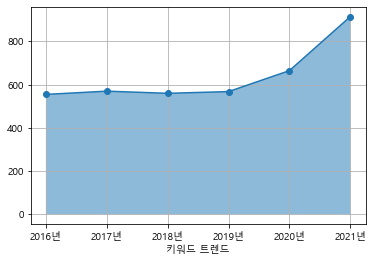

<Figure size 432x288 with 0 Axes>

In [21]:
import matplotlib.pyplot as plt
x = ['2016년', '2017년', '2018년', '2019년', '2020년', '2021년']
y = [555,570,560,568,665,915]
plt.plot(x,y, marker='o')
#plt.ylabel('기사 건수')
plt.xlabel('키워드 트렌드')
plt.fill_between(x, y, alpha=0.5)

plt.grid()
plt.show()



save_img = 'trend.png'

plt.savefig(save_img)

In [ ]:
# 보이스피싱 검색(지면기사)
#2016 -> 56
#2017 -> 57
#2018 -> 56
#2019 => 57
#2020 -> 67
#2021 -> 92